In [3]:
# 주사위던지기 이산확률
from lea import leaf
import lea
import numpy as np

dice = leaf.dice(1,prob_type='r')
print(dice)

X = dice.support #확률변수 조회
p_x = dice.ps
x_sum = dice.p_sum
print(f'확률변수: {X}, 각 확률: {p_x}, 모든 확률 합: {x_sum}')

1 : 1/6
2 : 1/6
3 : 1/6
4 : 1/6
5 : 1/6
6 : 1/6
확률변수: (1, 2, 3, 4, 5, 6), 각 확률: (1/6, 1/6, 1/6, 1/6, 1/6, 1/6), 모든 확률 합: 1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 1 to 6
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   f(dice)  6 non-null      object
dtypes: object(1)
memory usage: 96.0+ bytes
None

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, f(dice) to f(dice)
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1       1 non-null      object
 1   2       1 non-null      object
 2   3       1 non-null      object
 3   4       1 non-null      object
 4   5       1 non-null      object
 5   6       1 non-null      object
dtypes: object(6)
memory usage: 136.0+ bytes
None
           1    2    3    4    5    6
f(dice)  1/6  1/6  1/6  1/6  1/6  1/6

x: (4,), p:1/6


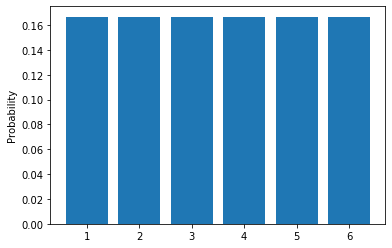

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

pt = pd.DataFrame(dice.ps,index=dice.support,columns=['f(dice)'])
print(pt.info())
print()
pt_t = pt.T
print(pt_t.info())
print(pt_t)
print()
x = dice.random_draw(1) #인자는 1개만 입력. 1이면 1개의 주사위 결과, 2이면 2개의 결과, ...
p = dice.p(x[0])
print(f'x: {x}, p:{p}')
dice.plot()
plt.show()

A : 1/6
B : 2/6
C : 3/6 
 1
A : 0.16666666666666666
B : 0.3333333333333333
C : 0.5 
 1.0


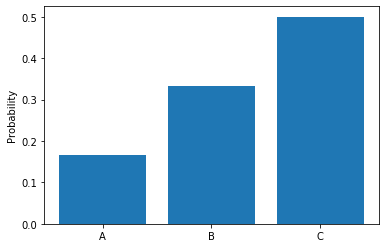

In [9]:
# 일반적 이산확률 생성시 vals 함수 사용
from lea import leaf
import lea
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

symbol = lea.vals('A','B','B','C','C','C',prob_type='r')
print(symbol, '\n', symbol.p_sum)

# 확률질량함수를 이용한 이산확률 만들기
symbol2 = lea.pmf({'A':1,'B':2,'C':3})
print(symbol2, '\n', symbol2.p_sum)

symbol.plot()

In [10]:
flip = lea.vals('H','T',prob_type='r')
p1 = flip.p('T')
p2 = lea.P(flip == 'T')
print(p1,p2)

df = pd.DataFrame(flip.ps, index=flip.support, columns=['coin'])
print(df.T)

1/2 1/2
        H    T
coin  1/2  1/2


In [17]:
# 동전을 5번 던진 후의 랜덤하게 발생된 사건에 대한 확률
import random

random.seed(7777) #이게 없으면 run돌릴 때마다 확률분포가 달라진다.
flip = lea.vals('H','T',prob_type='r')
temp = flip.random(5)
flip2 = lea.vals(*temp,prob_type='r') #*변수 : unpacking(낱개로 들어간다.분리역할)

b = lea.P(flip2 == 'H')
print(b)

3/5


In [18]:
dice = leaf.dice(1,prob_type='r')
b = lea.P((dice==2)|(dice==4)|(dice==6))
print(b)

c = lea.P(dice%2==0)
print(c)

# 조건부확률 : given 메소드 사용
d = dice.given((dice%2==0)).p(4) 
print(d)

1/2
1/2
1/3


In [21]:
dice1 = lea.interval(1,6,prob_type='r')
dice2 = dice1.new() #복사
dice3 = lea.joint(dice1,dice2)

df = pd.DataFrame(dice3.ps,index=dice3.support,columns=['dice joint'])
print(df.T)

# 첫 번째 주사위가 2보다 작은 수가 나오는 조건부확률
print(dice3.given(dice1 <= 2))

               1                                   2                    ...  \
               1     2     3     4     5     6     1     2     3     4  ...   
dice joint  1/36  1/36  1/36  1/36  1/36  1/36  1/36  1/36  1/36  1/36  ...   

               5                       6                                
               3     4     5     6     1     2     3     4     5     6  
dice joint  1/36  1/36  1/36  1/36  1/36  1/36  1/36  1/36  1/36  1/36  

[1 rows x 36 columns]
(1, 1) : 1/12
(1, 2) : 1/12
(1, 3) : 1/12
(1, 4) : 1/12
(1, 5) : 1/12
(1, 6) : 1/12
(2, 1) : 1/12
(2, 2) : 1/12
(2, 3) : 1/12
(2, 4) : 1/12
(2, 5) : 1/12
(2, 6) : 1/12


In [ ]:
P(첫|분) = P(분|첫)*P(첫)/P(분) = 0.75*0.5/(0.5*0.75+0.5*0.5) = 0.6
P(L|p) = P(p|L)*P(L)/P(p) = 0.99*0.01/(0.01*0.99+0.99*0.01) = 0.495

In [ ]:
P(아산|불량) = P(불량|아산)*P(아산)/P(불량) = 0.03*0.7/(0.3*0.02+0.7*0.03) = 0.78

In [29]:
# 파이썬코드로 조건부확률 구현
# 바구니1에는 노랑사탕 30개, 빨강사탕 10개 / 바구니2에는 노랑사탕과 빨강사탕 각 20개가 들어있다.
candy = lea.pmf({'Y':50,'R':30},prob_type='r')
candy.p('Y') # >> P(Y)

# P(basket_1|Y) = ?
basket1.p('basket_1')*basket_1.p('Y')/candy.p('Y') # >> P(basket_1)*P(Y|basket_1)/P(Y)

3/5

basket_1 : 1/2
basket_2 : 1/2
R : 1/4
Y : 3/4
       basket_1 basket_2
yellow      1/4      1/2
red         3/4      1/2


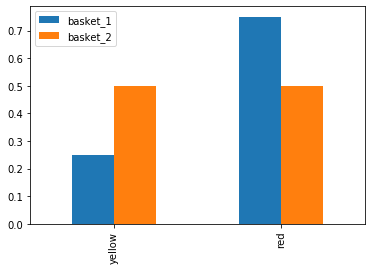

In [30]:
from lea import leaf
import lea
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

basket1 = lea.vals("basket_1","basket_2",prob_type='r')
print(basket1)

basket1.p('basket_1')
basket_1 = lea.pmf({'Y':30,'R':10},prob_type='r')
print(basket_1)
basket_2 = lea.pmf({'Y':20, 'R':20},prob_type='r')

# 확률분포 생성
data = {'basket_1':basket_1.ps,'basket_2':basket_2.ps}
df = pd.DataFrame(data,index=['yellow','red'])
print(df)

# bar chart로 표현할 때, 유리수는 처리못하므로 실수로 변경
df_ = df.astype('float')
df_.plot(kind='bar')